# Uniform NSOLT dictionary learning

 Requirements: Python 3.7.x, PyTorch 1.7.x, Graphviz
 
 Contact address: Shogo MURAMATSU

 Faculty of Engineering, Niigata University,
 8050 2-no-cho Ikarashi, Nishi-ku,
 Niigata, 950-2181, JAPAN
 http://msiplab.eng.niigata-u.ac.jp 
 
 Copyright (c) 2021, Shogo MURAMATSU, All rights reserved.

## Preparation

In [6]:
import math


## Parameter settings
 
* Decimation factor
* Number of channels
* Sparsity ratio
* Number of iterations
* Standard deviation of initial angles
* Patch size for training
* Number of patches

In [7]:
# Decimation factor (Strides)
decFactor = [2, 2] # [My Mx]
nDecs = decFactor[0]*decFactor[1] # prod(decFactor)

# Number of channels ( sum(nChannels) >= prod(decFactors) )
nChannels = [3, 3] # [Ps Pa] (Ps=Pa)
redundancyRatio = sum(nChannels)/nDecs

# Polyphase order
ppOrder = [2, 2]

# Sparsity ratio
sparsityRatio = 1/3

# Number of iterations
nIters = 3

# Standard deviation of initial angles
stdInitAng = math.pi/6

# Patch size for training
szPatchTrn = [32, 32] # > [ (Ny+1)My (Nx+1)Mx ]

# Number of patchs per image
nSubImgs = 64

# No DC-leakage
noDcLeakage = True

In [8]:
# Setting of dictionary update step
learning_rate = 1e-3
batch_size = 8
epochs = 8
momentum = 0.9


## Convolutional dictionary learning
 
### Problem setting:

 $\{\hat{\mathbf{\theta}},\{ \hat{\mathbf{s}}_n \}\}=\arg\min_{\{\mathbf{\theta},\{\mathbf{s}_n\}\}}\frac{1}{2S}\sum_{n=1}^{S}\|\mathbf{v}_n-\mathbf{D}_{\mathbf{\theta}}\hat{\mathbf{s}}_n\|_2^2,\ 
 \quad\mathrm{s.t.}\ \forall n, \|\mathbf{s}_n\|_0\leq K,$
 
 where $\mathbf{D}_{\mathbf{\theta}}$ is a convolutional dictionary with the 
 design parameter vector 
 $\mathbf{\theta}$.
 
 
### Algorithm:
 Iterate the sparse approximation step and the dictionary update step.

 * Sparse approximation step

 $\hat{\mathbf{s}}_n=\arg\min_{\mathbf{s}_n}\frac{1}{2} \|\mathbf{v}_n-\hat{\mathbf{D}}\mathbf{s}_n\|_2^2\ 
 \quad \mathrm{s.t.}\ \|\mathbf{s}_n\|_0\leq K$

* Dictionary update step
 
 $\hat{\mathbf{\theta}}=\arg\min_{\mathbf{\theta}}\frac{1}{2S}\sum_{n=1}^{S}\|\mathbf{v}_n-\mathbf{D}_{\mathbf{\theta}}\hat{\mathbf{s}}_n\|_2^2$

 $\hat{\mathbf{D}}=\mathbf{D}_{\hat{\mathbf{\theta}}}$

## Bivariate lattice-structure oversampled filter banks 

As an example, let us adopt a non-separable oversampled lapped transform (NSOLT) of  type-I with the number of channels (the numbers of even and odd symmetric channels are identical to each other) and polyphase order (even):
 
 $\mathbf{E}(z_\mathrm{v},z_\mathbf{h})=\left(\prod_{k_\mathrm{h}=1}^{N_\mathrm{h}/2}{\mathbf{V}_{2k_\mathrm{h}}^{\{\mathrm{h}\}}}\bar{\mathbf{Q}}(z_\mathrm{h}){\mathbf{V}_{2k_\mathrm{h}-1}^{\{\mathrm{h}\}}}{\mathbf{Q}}(z_\mathrm{h})\right)
 \left(\prod_{k_{\mathrm{v}}=1}^{N_\mathrm{v}/2}{\mathbf{V}_{2k_\mathrm{v}}^{\{\mathrm{v}\}}}\bar{\mathbf{Q}}(z_\mathrm{v}){\mathbf{V}_{2k_\mathrm{v}-1}^{\{\mathrm{v}\}}}{\mathbf{Q}}(z_\mathrm{v})\right)\mathbf{V}_0\mathbf{E}_0,$

 $\mathbf{R}(z_\mathrm{v},z_\mathbf{h})=\mathbf{E}^T(z_\mathrm{v}^{-1},z_\mathrm{h}^{-1}),$ where

 * $\mathbf{E}(z_\mathrm{v},z_\mathrm{h})$:  Type-I polyphase matrix of the analysis filter bank
 * $\mathbf{R}(z_\mathrm{v},z_\mathrm{h})$: Type-II polyphase matrix in the synthesis filter bank
 * $z_d\in\mathbb{C}, d\in\{\mathrm{v},\mathrm{h}\}$: The parameter of Z-transformation direction
 * $N_d\in \mathbb{N}, d\in\{\mathrm{v},\mathrm{h}\}$: Polyphase order in direction 
 $d$ (number of overlapping blocks)
 * $\mathbf{V}_0=\left(\begin{array}{cc}\mathbf{W}_{0} & \mathbf{O} \\ \mathbf{O} 
 & \mathbf{U}_0\end{array}\right)
 \left(\begin{array}{c}\mathbf{I}_{M/2} \\ \mathbf{O} 
 \\\mathbf{I}_{M/2} \\\mathbf{O}\end{array}\right)\in\mathbb{R}^{P\times M}$, 
 $\mathbf{V}_n^{\{d\}}=\left(\begin{array}{cc}\mathbf{I}_{P/2} 
 & \mathbf{O} \\\mathbf{O} & \mathbf{U}_n^{\{d\}}\end{array}\right)\in\mathbb{R}^{P\times 
 P}, d\in\{\mathrm{v},\mathrm{h}\}$, 
 where$\mathbf{W}_0, \mathbf{U}_0,\mathbf{U}_n^{\{d\}}\in\mathbb{R}^{P/2\times 
 P/2}$ are orthonromal matrices.
 * $\mathbf{Q}(z)=\mathbf{B}_{P}\left(\begin{array}{cc} \mathbf{I}_{P/2} &  
 \mathbf{O} \\ \mathbf{O} &  z^{-1}\mathbf{I}_{P/2}\end{array}\right)\mathbf{B}_{P}$, 
 $\bar{\mathbf{Q}}(z)=\mathbf{B}_{P}\left(\begin{array}{cc} z\mathbf{I}_{P/2} 
 &  \mathbf{O} \\ \mathbf{O} &  \mathbf{I}_{P/2}\end{array}\right)\mathbf{B}_{P}$, 
 $\mathbf{B}_{P}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc} \mathbf{I}_{P/2} &  
 \mathbf{I}_{P/2} \\ \mathbf{I}_{P/2} &  -\mathbf{I}_{P/2}\end{array}\right)$
 

【Example】For $P/2=3$, a parametric orthonormal matrix $\mathbf{U}(\mathbf{\theta},\mathbf{\mu})$ 
 can be constructed by 
 
 $\mathbf{U}(\mathbf{\theta},\mathbf{\mu}) \colon = \left(\begin{array}{cc} 
 \mu_1 & 0& 0\\ 0 & \mu_1 & 0 \\ 0 & 0 & \mu_2 \end{array}\right)\left(\begin{array}{ccc}  
 1 & 0 & 0 \\0 & \cos\theta_2& -\sin\theta_2 \\ 0 & \sin\theta_2 & \cos\theta_2 
 \end{array}\right)\left(\begin{array}{ccc} \cos\theta_1& 0 & -\sin\theta_1  
 \\  0 & 1 & 0 \\\sin\theta_1 & 0 &  \cos\theta_1  \end{array}\right)\left(\begin{array}{ccc} 
 \cos\theta_0& -\sin\theta_0 & 0 \\ \sin\theta_0 & \cos\theta_0 & 0 \\ 0 & 0 
 & 1 \end{array}\right),$
 
 ${\mathbf{U}(\mathbf{\theta},\mathbf{\mu})}^T = \left(\begin{array}{ccc} 
 \cos\theta_0& \sin\theta_0 & 0 \\ -\sin\theta_0 & \cos\theta_0 & 0 \\ 0 & 0 
 & 1 \end{array}\right)\left(\begin{array}{ccc} \cos\theta_1& 0 & \sin\theta_1  
 \\  0 & 1 & 0 \\-\sin\theta_1 & 0 &  \cos\theta_1  \end{array}\right)\left(\begin{array}{ccc} 
 1 & 0 & 0 \\0 & \cos\theta_2& \sin\theta_2 \\ 0 & -\sin\theta_2 & \cos\theta_2 
 \end{array}\right)\left(\begin{array}{cc} \mu_0 & 0& 0\\ 0 & \mu_1 & 0 \\ 0 
 & 0 & \mu_2 \end{array}\right),$
 
 where $\mathbf{\theta}\in\mathbb{R}^{(P-2)P/8}$ and $\mathbf{\mu}=\{-1,1\}^{P/2}$. 
 For the sake of simplification, the sign parameters $\mu_k$ are fixed to $-1$ for 
 $\mathbf{U}_n^{\{d\}}$ witn odd $n$, otherwise they are fixed to $+1$.
 
 Partial differentiation can be, for examle, conducted as
 
 $\frac{\partial}{\partial \theta_1}{\mathbf{U}(\mathbf{\theta},\mathbf{\mu})}^T 
 = \left(\begin{array}{ccc} \cos\theta_0& \sin\theta_0 & 0 \\ -\sin\theta_0 
 & \cos\theta_0 & 0 \\ 0 & 0 & 1 \end{array}\right)\left(\begin{array}{ccc} 
 -\sin\theta_1& 0 & \cos\theta_1  \\  0 & 0 & 0 \\-\cos\theta_1 & 0 &  -\sin\theta_1  
 \end{array}\right)\left(\begin{array}{ccc} 1 & 0 & 0 \\0 & \cos\theta_2& \sin\theta_2 
 \\ 0 & -\sin\theta_2 & \cos\theta_2 \end{array}\right)\left(\begin{array}{cc} 
 \mu_0 & 0& 0\\ 0 & \mu_1 & 0 \\ 0 & 0 & \mu_2 \end{array}\right).$



## Definition of custom layers and networks 
 
 Use a custom layer of PyTorch to implement Synthesis NSOLT (Synthesis NSOLT). Definition of layers w/ Learnable properties

 * Final rotation: $\mathbf{V}_0^T$ (torch_nsolt.nsoltFinalRotation2dLayer)
 * Intermediate rotation: ${\mathbf{V}_n^{\{d\}}}^T$ (torch_nsolt.nsoltIntermediateRotation2dLayer)
 Definition of layers w/o Learnable properties
 
 * Bivariate inverese DCT (2-D IDCT): $\mathbf{E}_0^T=\mathbf{E}_0^{-1}$ (torch_nsolt.nsoltBlockDct2dLayer)
 * Vertical up extension: $\mathbf{Q}^T(z_\mathrm{v}^{-1})$ (torch_nsolt.nsoltAtomExtension2dLayer)
 * Vertical down extension: $\bar{\mathbf{Q}}^T(z_\mathrm{v}^{-1})$  (torch_nsolt.nsoltAtomExtension2dLayer)
 * Horizontal left extension: $\mathbf{Q}^T(z_\mathrm{h}^{-1})$ (torch_nsolt.nsoltAtomExtension2dLayer)
 * Horizontal right extension: $\bar{\mathbf{Q}}^T(z_\mathrm{h}^{-1})$ (torch_nsolt.nsoltAtomExtension2dLayer)


【References】 
 
 * MATLAB SaivDr Package: https://github.com/msiplab/SaivDr 
 * S. Muramatsu, K. Furuya and N. Yuki, "Multidimensional Nonseparable Oversampled 
 Lapped Transforms: Theory and Design," in IEEE Transactions on Signal Processing, 
 vol. 65, no. 5, pp. 1251-1264, 1 March1, 2017, doi: 10.1109/TSP.2016.2633240.
 * S. Muramatsu, T. Kobayashi, M. Hiki and H. Kikuchi, "Boundary Operation 
 of 2-D Nonseparable Linear-Phase Paraunitary Filter Banks," in IEEE Transactions 
 on Image Processing, vol. 21, no. 4, pp. 2314-2318, April 2012, doi: 10.1109/TIP.2011.2181527.
 * S. Muramatsu, M. Ishii and Z. Chen, "Efficient parameter optimization for 
 example-based design of nonseparable oversampled lapped transform," 2016 IEEE 
 International Conference on Image Processing (ICIP), Phoenix, AZ, 2016, pp. 
 3618-3622, doi: 10.1109/ICIP.2016.7533034.
 * Furuya, K., Hara, S., Seino, K., & Muramatsu, S. (2016). Boundary operation 
 of 2D non-separable oversampled lapped transforms. _APSIPA Transactions on Signal 
 and Information Processing, 5_, E9. doi:10.1017/ATSIP.2016.3.


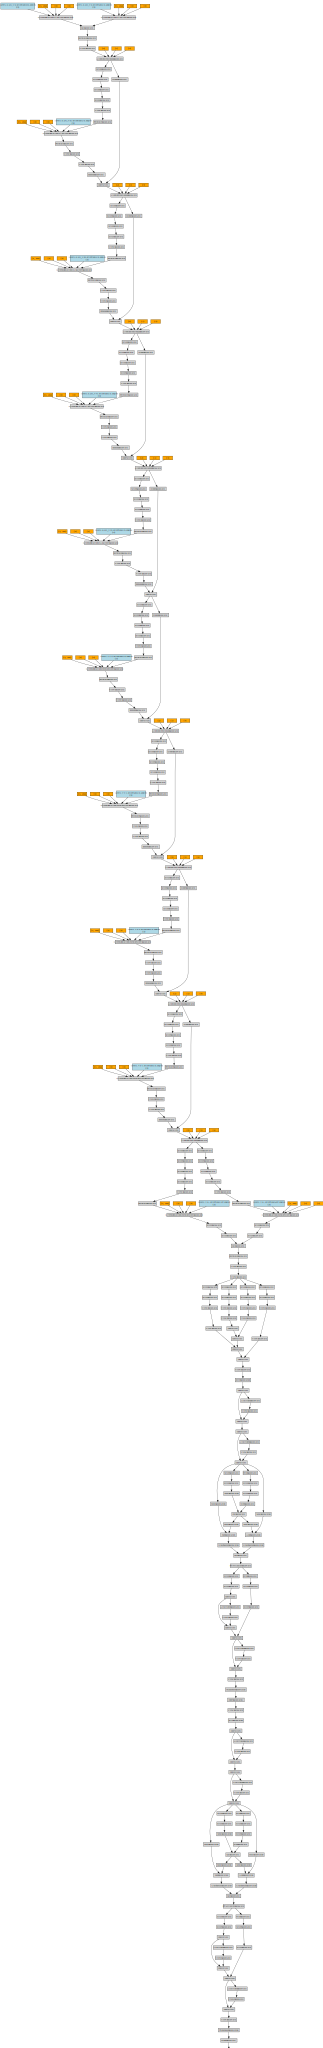

In [9]:
import sys
sys.path.append('../../appendix/')
sys.path.append('../../appendix/torch_nsolt/')
import torch
import torch.nn
import torch_nsolt as nsolt
from torchviz import make_dot
from torch_nsolt.orthonormalTransform import OrthonormalTransform
from itertools import chain

# Construction of deep learning network
analysisnet = nsolt.NsoltAnalysis2dNetwork(
    number_of_channels = nChannels,
    decimation_factor = decFactor,
    polyphase_order = ppOrder,
    number_of_vanishing_moments = noDcLeakage
)

# Initialize
def init_angles(m):
    if type(m) == OrthonormalTransform:
        torch.nn.init.normal_(m.angles,mean=0.0,std=stdInitAng)
analysisnet.apply(init_angles)
synthesisnet = analysisnet.T

# Visualize 
height, width = szPatchTrn
torch.manual_seed(0)
x = torch.randn(1,1,height,width,dtype=torch.float,requires_grad=False)
y = synthesisnet(analysisnet(x))
params_dict = dict(chain(analysisnet.named_parameters(), synthesisnet.named_parameters()))
make_dot(y,params=params_dict)

In [10]:
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)